# MMM Toy Data Set

* Create a toy data set to explore relationships in Robyn
* Data set should include pre-Robyn window period to avoid cold start and take advantage of how Robyn uses data outside the window to estimate carryover marketing effects going into the first window day.

In [1]:
import os
import sys
import pandas as pd
import numpy as np

In [2]:
np.random.seed(43)

bookings_columns = ['bookings_tv_noiseless', 'bookings_tv_noisy', 'bookings_tv_context_0_center', 'bookings_tv_context_0_anchored']

#
# data set has no lag effect from media at all here
#
for stderr in [600000]:
    print(f'Creating data set with stderr {stderr}')
    df = pd.DataFrame({'date':pd.date_range(start='2015-01-01', end='2021-12-31')})

    # marketing effort
    #
    # random tv marketing from 0 to 10000 each period
    df['tv'] = np.random.randint(0, 10000, size=len(df))
    
    # 
    df['context_0_center'] = np.random.normal( size=len(df))
    
    df['context_100_center'] = 100 + df.context_0_center
    
    df['context_0_anchored'] = np.random.randint(0, 100000, size=len(df)) * 0.00005
    
    fixed_bookings = 10000000
    tv_scale = 200
    context_scale = 800000
    df['bookings_tv_noiseless'] = fixed_bookings + df.tv * tv_scale
    df['bookings_tv_noisy'] = fixed_bookings + df.tv * tv_scale + np.random.normal(loc=0, scale=stderr, size=len(df)) 
    
    # we use this whether predicting with context_0_center or context_100_center.  Those are two different forms of describing the same context
    df['bookings_tv_context_0_center'] = df.bookings_tv_noisy + df.context_0_center * context_scale
    
    df['bookings_tv_context_0_anchored'] = df.bookings_tv_noisy + df.context_0_anchored * context_scale
    
    for i in bookings_columns:
        print(f'Checking {i} for negative values')
        assert len(df[df[i]<0]) == 0, f'{i} has negative values which is not permitted'
    
    df.to_csv(os.path.join('data', f'robyn_toy_data_{stderr}err.csv'))


Creating data set with stderr 600000
Checking bookings_tv_noiseless for negative values
Checking bookings_tv_noisy for negative values
Checking bookings_tv_context_0_center for negative values
Checking bookings_tv_context_0_anchored for negative values


<AxesSubplot:xlabel='tv', ylabel='bookings_tv_noisy'>

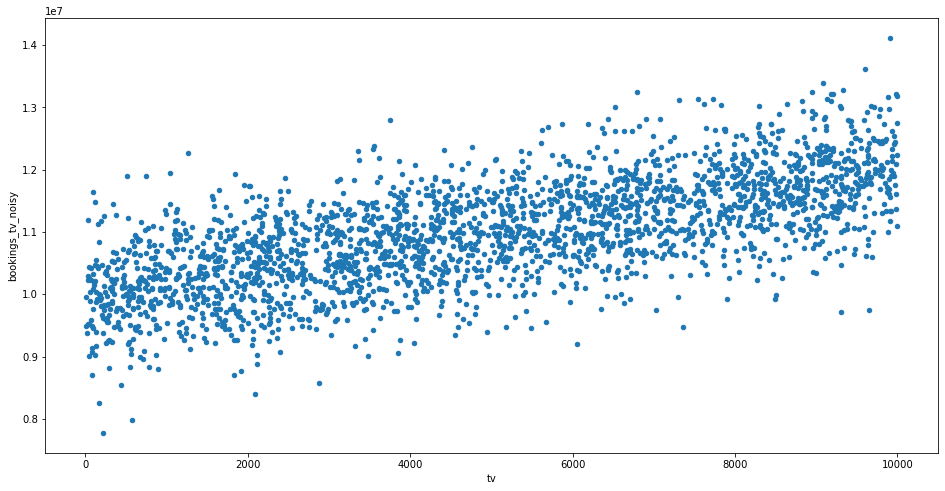

In [3]:
import matplotlib.pyplot as plt

df.plot.scatter(y='bookings_tv_noisy', x='tv', figsize=(16,8))

<AxesSubplot:xlabel='tv', ylabel='bookings_tv_noiseless'>

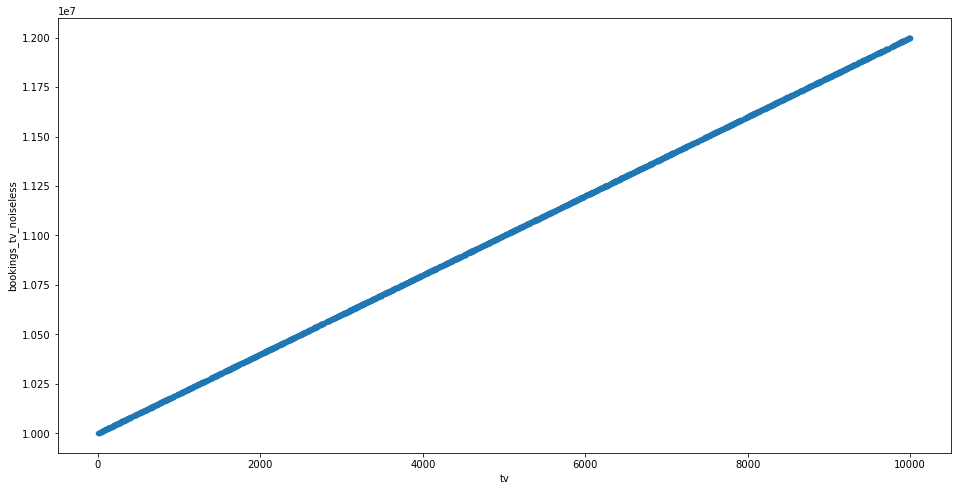

In [7]:
df.plot.scatter(y='bookings_tv_noiseless', x='tv', figsize=(16,8))

<AxesSubplot:xlabel='tv', ylabel='bookings_tv_context_0_center'>

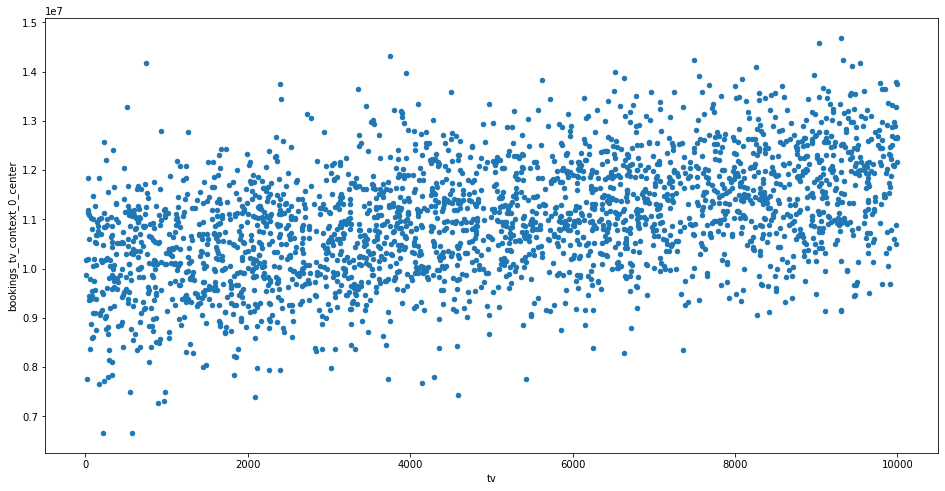

In [4]:
df.plot.scatter(y='bookings_tv_context_0_center', x='tv', figsize=(16,8))

<AxesSubplot:xlabel='tv', ylabel='bookings_tv_context_0_anchored'>

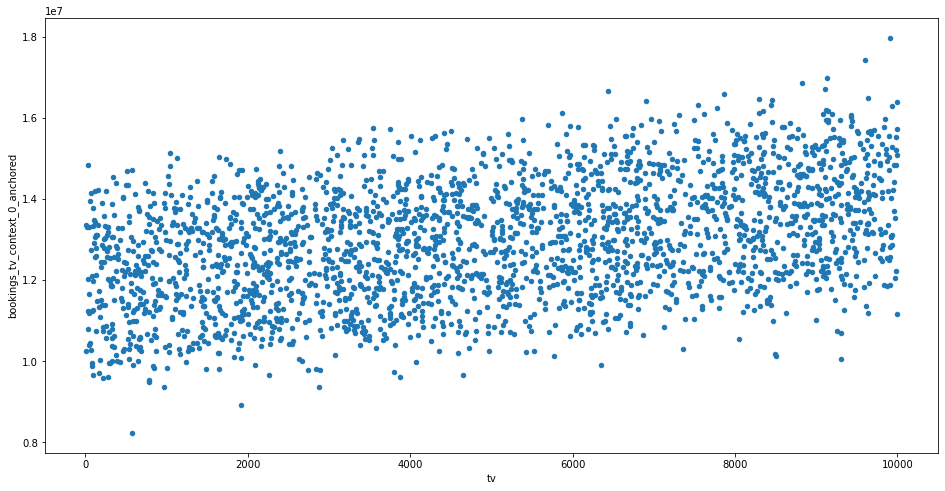

In [5]:
df.plot.scatter(y='bookings_tv_context_0_anchored', x='tv', figsize=(16,8))

In [6]:
for i in bookings_columns:
    print(f'{i}: mean {df[i].mean():.0f} and stddev {df[i].std():.0f}')

bookings_tv_noiseless: mean 10994678 and stddev 571638
bookings_tv_noisy: mean 10980004 and stddev 843780
bookings_tv_context_0_center: mean 10985795 and stddev 1178384
bookings_tv_context_0_anchored: mean 12967242 and stddev 1439280
